In [6]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# Load data
data_frame = pd.read_csv('data.csv')
X = data_frame[['x', 'y']].values

<Figure size 432x432 with 0 Axes>

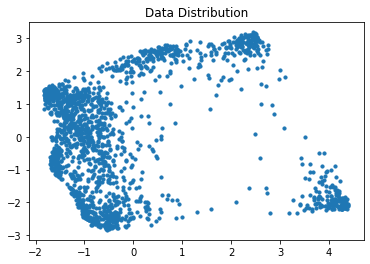

<Figure size 432x432 with 0 Axes>

In [3]:
# Data distribution visualization
plt.scatter(X[:, 0], X[:, 1], s=10) # Plot data points distribution
plt.title('Data Distribution') 
plt.figure(figsize=(6,6))

## k-mean and SSE

In [3]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load data
data_frame = pd.read_csv('data.csv')
# print(data_frame.head(3))

X = data_frame[['x', 'y']].values

print('loading successfully')

loading successfully


In [4]:
from sklearn.cluster import KMeans
data_frame = pd.read_csv('data.csv')
X = data_frame[['x', 'y']].values

End = 10
kset1 = [[] for _ in range(1,End+1)]

for i in range(0,10):
    kmeans = KMeans(n_clusters = i+1, random_state= 1)
    km = kmeans.fit(X) # Compute k-means clustering
    SSE_cluster = km.inertia_
    kset1[i] = [i+1,SSE_cluster]

kset1 = np.array(kset1)

k = 4 is suggested from the figure with SSE.

### Change distance

In [5]:
from sklearn.cluster import KMeans
data_frame = pd.read_csv('data.csv')
X = data_frame[['x', 'y']].values

End = 10
kset2 = [[] for _ in range(1,End+1)]

for i in range(0,10):
    kmeans = KMeans(n_clusters = i+1, random_state= 1)
    km = kmeans.fit(X) # Compute k-means clustering
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    label = 0; 
    SSE = 0;
    
    for center in centers: # for each cluster center
        X_current_cluster = X[y_kmeans==label] # get the data in the cluster
        
        for x in X_current_cluster: # for each data
            SSE = SSE + pow(np.linalg.norm((x - center),ord=1),2) 
            # calcualte the square of distance and add to SSE
        
        label=label+1; # update the label for the next cluster
    
    kset2[i] = [i+1,SSE]

kset2 = np.array(kset2)

In [6]:
from sklearn.cluster import KMeans
data_frame = pd.read_csv('data.csv')
X = data_frame[['x', 'y']].values

End = 10
kset3 = [[] for _ in range(1,End+1)]

for i in range(0,10):
    kmeans = KMeans(n_clusters = i+1, random_state= 1)
    km = kmeans.fit(X) # Compute k-means clustering
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    label = 0; 
    SSE = 0;
    
    for center in centers: # for each cluster center
        X_current_cluster = X[y_kmeans==label] # get the data in the cluster
        
        for x in X_current_cluster: # for each data
            SSE = SSE + pow(np.linalg.norm((x - center),np.inf),2) 
            # calcualte the square of distance and add to SSE
        
        label=label+1; # update the label for the next cluster
    
    kset3[i] = [i+1,SSE]

kset3 = np.array(kset3)

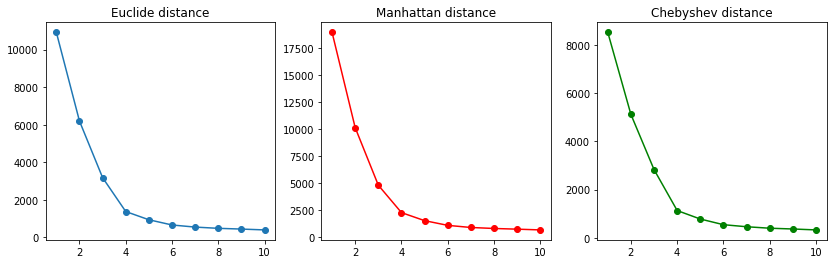

In [7]:
# Initialize the subplots
fig, axs = plt.subplots(1, 3, # set figure row and col
                        figsize=(14, 4)) # set fifg size

axs[0].set_title("Euclide distance")
axs[0].scatter(kset1[:, 0], kset1[:, 1]) # Plot data points distribution
axs[0].plot(kset1[:, 0], kset1[:, 1])

axs[1].set_title("Manhattan distance")
axs[1].scatter(kset2[:, 0], kset2[:, 1], color = "red") # Plot data points distribution
axs[1].plot(kset2[:, 0], kset2[:, 1], color = "red")

axs[2].set_title("Chebyshev distance")
axs[2].scatter(kset3[:, 0], kset3[:, 1], color = "green") # Plot data points distribution
axs[2].plot(kset3[:, 0], kset3[:, 1], color = "green")



Text(0.5, 1.0, 'k-mean Clustering Result, k=4')

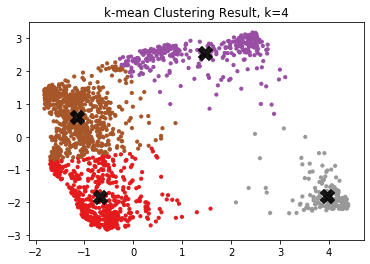

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state = 1) # Set the total number of the cluster to be 4, and random_state to be 1
kmeans.fit(X) # Compute k-means clustering
y_kmeans = kmeans.predict(X) # Allocate the data points to specific cluster

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='Set1') # Plot data points based on the cluster allocation
centers = kmeans.cluster_centers_ # Get cluster center info 
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, alpha=0.9); # Plot the cluseter center as the black X
plt.title('k-mean Clustering Result, k=4')

## AGNESS

In [8]:
# importing libraryes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# loading data
data = pd.read_csv("data.csv")
X = data_frame[['x', 'y']].values

print("loading is successful")

loading is successful


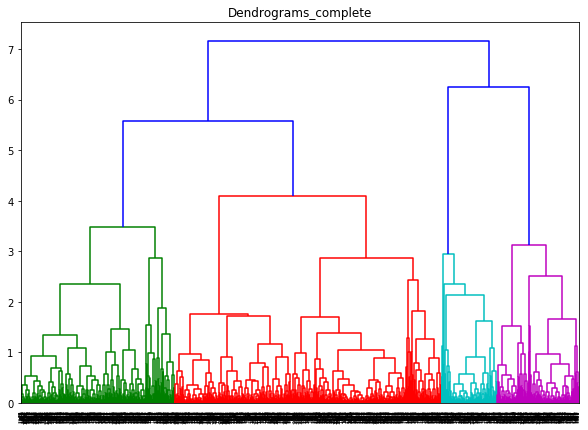

In [9]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms_complete")

# complete linkage and euclidean distance
dend_max = shc.dendrogram(shc.linkage(X, method='complete',metric="euclidean"))

Text(0.5, 1.0, 'Clustering Result_complete')

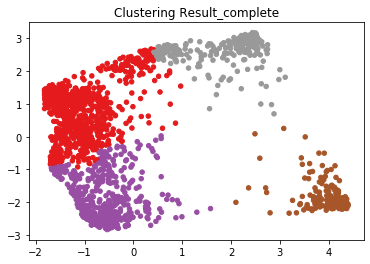

In [10]:
# The data will be clustered into 3 clusters, with Euclidean, and complete linkage
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
y_predict_comp = cluster.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predict_comp, s=20, cmap='Set1') # Plot data points based on the cluster allocation
plt.title('Clustering Result_complete')

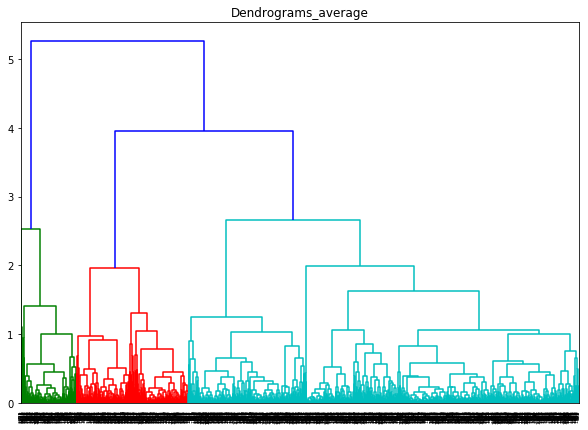

In [11]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms_average")

# complete linkage and euclidean distance
dend_max = shc.dendrogram(shc.linkage(X, method='average',metric="euclidean"))

Text(0.5, 1.0, 'Clustering Result_average')

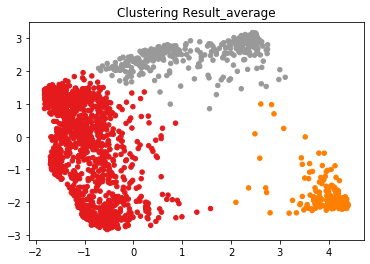

In [12]:
# the data will be clustered into 3 clusters, with Euclidean, and complete linkage
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')


# The clustering result of data
y_predict_ave = cluster.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predict_ave, s=20, cmap='Set1') # Plot data points based on the cluster allocation
plt.title('Clustering Result_average')

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Dendrograms_single")

# complete linkage and euclidean distance
dend_max = shc.dendrogram(shc.linkage(X, method='single',metric="euclidean"))

In [ ]:
# the data will be clustered into 3 clusters, with Euclidean, and complete linkage
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')

# The clustering result of data
y_predict_s = cluster.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predict_s, s=10, cmap='Set1') # Plot data points based on the cluster allocation
plt.title('Clustering Result_single')

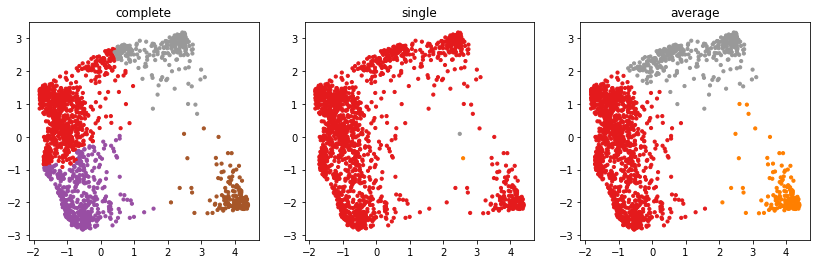

In [350]:
# Initialize the subplots
fig, axs = plt.subplots(1, 3, # set figure row and col
                        figsize=(14, 4)) # set fifg size

axs[0].set_title("complete")
axs[0].scatter(X[:, 0], X[:, 1], c=y_predict_comp, s=10, cmap='Set1') # Plot data points distribution

axs[1].set_title("single")
axs[1].scatter(X[:, 0], X[:, 1], c=y_predict_s, s=10, cmap='Set1')

axs[2].set_title("average")
axs[2].scatter(X[:,0], X[:, 1], c = y_predict_ave, s = 10, cmap = "Set1") # Plot data points distribution


## DBSCAN

In [8]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from pandas import DataFrame


In [9]:
len(X)

1797

In [44]:
import pandas as pd

# load data
data = pd.read_csv("data.csv")
X = data[["x","y"]].values

dist = [[] for i in range(len(X))]

# L2 norm ,Minnum = 10
for i in range(len(X)):
    L2 = []
    for j in range(len(X)):
        L2.append(np.linalg.norm((X[i] - X[j]), ord = 2))
    L2.sort()
    dist[i] = L2[9]
    
label = [i for i in range(1,1798)]
label = pd.array(label)
label

dist.sort()
dist = pd.array(dist)
dist

result = {'num': label, '3rd distance': dist}
result = pd.DataFrame(data = result)
result = result[["num","3rd distance"]].values

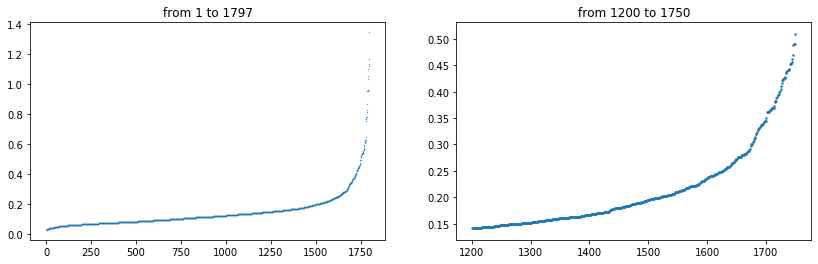

In [85]:
fig, axs = plt.subplots(1, 2, # set figure row and col
                        figsize=(14, 4)) # set fifg size

axs[0].set_title("from 1 to 1797")
axs[0].scatter(result[:,0], result[:,1], s=0.1)

axs[1].set_title("from 1200 to 1750")
axs[1].scatter(result[1200:1750,0], result[1200:1750,1], s=2)

In [76]:
import pandas as pd

# load data
data = pd.read_csv("data.csv")
X = data[["x","y"]].values

dist1 = [[] for i in range(len(X))]

# Minnum = 4
for i in range(len(X)):
    L1 = []
    for j in range(len(X)):
        L1.append(np.linalg.norm((X[i] - X[j]),ord=1))
    L1.sort()
    dist1[i]= L1[3]
    
label1 = [i for i in range(1,1798)]
label1 = pd.array(label1)
label1

dist1.sort()
dist1 = pd.array(dist1)
dist1

result1 = {'num': label1, '3rd distance': dist1}
result1 = pd.DataFrame(data = result1)
result1 = result1[["num","3rd distance"]].values

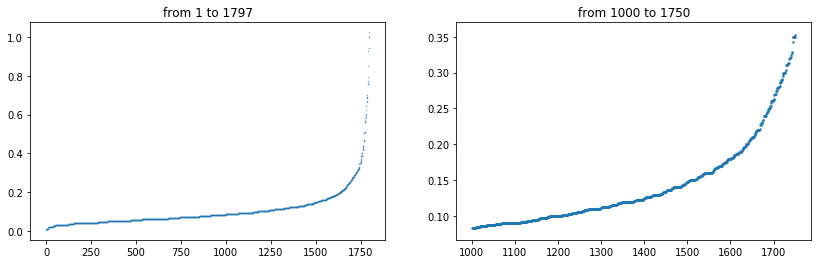

In [77]:
fig, axs = plt.subplots(1, 2, # set figure row and col
                        figsize=(14, 4)) # set fifg size

axs[0].set_title("from 1 to 1797")
axs[0].scatter(result1[:,0], result1[:,1], s=0.1)

axs[1].set_title("from 1000 to 1750")
axs[1].scatter(result1[1000:1750,0], result1[1000:1750,1], s=2)

Number of clusters: 9


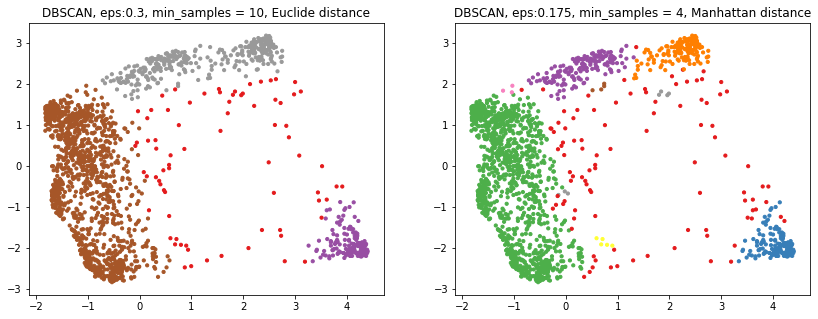

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5)) # set fifg size

data = pd.read_csv("data.csv")
X = data[["x","y"]].values
y_pred_scan1 = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)
y_pred_scan2 = DBSCAN(eps=0.175, min_samples=4).fit_predict(X)

axs[0].set_title("DBSCAN, eps:0.3, min_samples = 10, Euclide distance")
axs[0].scatter(X[:,0], X[:,1], c = y_pred_scan1, s=10, cmap = "Set1")

axs[1].set_title("DBSCAN, eps:0.175, min_samples = 4, Manhattan distance")
axs[1].scatter(X[:,0], X[:,1], c = y_pred_scan2, s=10, cmap = "Set1")


print("Number of clusters: {}".format(len(set(y_pred_scan2[np.where(y_pred_scan2 != -1)]))))